# 图像数字多分类实战
基于mnist数据集，建立mlp模型，实现0-9数字的十分类task  
1、实现mnist数据载入，可视化图形数字  
2、完成数据预处理：图像数据维度转换与归一化、输出结果格式转换  
3、计算模型在预测数据集的准确率  
4、模型结构：两层隐藏层，每层有392个神经元  

In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
#load the mnist data
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [2]:
print(type(X_train),X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


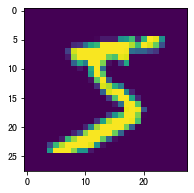

In [3]:
#visualize the data
img1=X_train[0]
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(3,3))
plt.imshow(img1)

In [4]:
import pandas as pd
pd.DataFrame(img1).iloc[:,3:23]

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247
6,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195
7,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39
8,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0
9,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0


In [5]:
#formate the input data
feature_size=img1.shape[0]*img1.shape[1]
X_train_format=X_train.reshape(X_train.shape[0],feature_size)
X_test_format=X_test.reshape(X_test.shape[0],feature_size)

In [6]:
#normalize the input data
X_train_normal=X_train_format/255
X_test_normal=X_test_format/255

In [7]:
#format the output data(labels)
from keras.utils import to_categorical
y_train_format=to_categorical(y_train)
y_test_format=to_categorical(y_test)
y_train_format[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
print(X_train_normal.shape,y_train_format.shape)

(60000, 784) (60000, 10)


![mlp](images/mlp.png)

In [9]:
#set up the model
from keras.models import Sequential
from keras.layers import Dense,Activation

mlp=Sequential()
mlp.add(Dense(units=392,activation='relu',input_dim=784))
mlp.add(Dense(units=392,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 392)               154056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3930      
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
#configure the model
mlp.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])


In [11]:
#train the model
mlp.fit(X_train_normal,y_train_format,epochs=10)


Epoch 1/10
60000/60000 [==============================] - 46s 770us/step - loss: 0.1891 - categorical_accuracy: 0.9418
Epoch 2/10
60000/60000 [==============================] - 44s 732us/step - loss: 0.0812 - categorical_accuracy: 0.9739
Epoch 3/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.0554 - categorical_accuracy: 0.9822
Epoch 4/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.0430 - categorical_accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 45s 744us/step - loss: 0.0346 - categorical_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 44s 741us/step - loss: 0.0274 - categorical_accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] - 45s 746us/step - loss: 0.0241 - categorical_accuracy: 0.9923
Epoch 8/10
60000/60000 [==============================] - 45s 748us/step - loss: 0.0244 - categorical_accuracy: 0.9920
Epoch 9/10
60000/60000 [=======================

In [12]:
#evaluate the model
y_train_predict=mlp.predict_classes(X_train_normal)
y_test_predict=mlp.predict_classes(X_test_normal)
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train,y_train_predict)
accuracy_test=accuracy_score(y_test,y_test_predict)
print('accuracy_train:',accuracy_train)
print('accuracy_test :',accuracy_test)

accuracy_train: 0.9971166666666667
accuracy_test : 0.9835


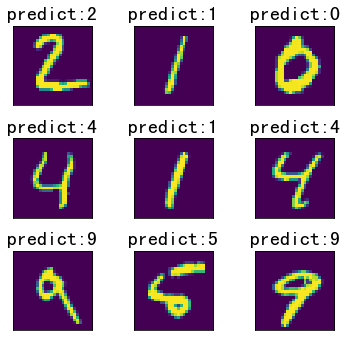

In [18]:
import matplotlib as mlp
font={'family':'SimHei','weight':'normal','size':20}
a=[i for i in range(1,10)]
fig4=plt.figure(figsize=(5,5))
for i in a:
    plt.subplot(3,3,i)
    plt.tight_layout()
    plt.imshow(X_test[i])
    plt.title('predict:{}'.format(y_test_predict[i]),font)
    plt.xticks([])
    plt.yticks([])

图像数字多分类实战summary:  
1、通过mlp模型，实现了基于图像数据的数字自动识别分类  
2、完成了图像数字化处理与可视化  
3、对mlp模型的输入、输出格式有了更深的认识，完成了数据预处理与格式转换  
4、建立了结构更为复杂的mlp模型